## Libraries

In [2]:
import math
import sys
import os
from pathlib import Path
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [3]:
path = Path(os.path.abspath(''))
util_path = str(path.parent.absolute())

if util_path not in sys.path:
    sys.path.append(util_path)
    
from utils import helpers

In [4]:
pd.set_option('display.max_columns',None)
plt.style.use("fivethirtyeight")
np.seterr(divide = 'ignore')
warnings.filterwarnings('ignore')

## Import Data

In [5]:
def get_marketing_data():
    data = pd.read_csv("../data/raw/bank-full.csv", sep=';')
    return data

In [6]:
df = get_marketing_data()
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [7]:
print('df shape: {}'.format(df.shape))

df shape: (45211, 17)


In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
for column in df.columns:
    print('Column: {} - Unique Values: {}'.format(column, df[column].unique()))

Column: age - Unique Values: [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
Column: job - Unique Values: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Column: marital - Unique Values: ['married' 'single' 'divorced']
Column: education - Unique Values: ['tertiary' 'secondary' 'unknown' 'primary']
Column: default - Unique Values: ['no' 'yes']
Column: balance - Unique Values: [ 2143    29     2 ...  8205 14204 16353]
Column: housing - Unique Values: ['yes' 'no']
Column: loan - Unique Values: ['no' 'yes']
Column: contact - Unique Values: ['unknown' 'cellular' 'telephone']
Column: day - Unique Values: [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
Column: 

In [11]:
df.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

## Pre-processing

In [12]:
# Pre-processing with method chaining

cols_to_category = [
    "job",
    "marital",
    "education",
    "default",
    "housing",
    "loan",
    "contact",
    "month",
    "poutcome",
]
df[cols_to_category] = df[cols_to_category].astype("category")
df["y"] = np.where(df["y"] == "no", 0, 1)

## EDA

1. Visualize all the cols
2. Check for outliers
3. Random forest feature importance
4. Check target distribution
5. Check for missing values

In [68]:
from importlib import reload  # Python 3.4+
reload(helpers)

<module 'utils.helpers' from '/home/david.zhao/value-ml/utils/helpers.py'>

In [69]:
target_name = 'y'
outcome_str = 'uptake'

In [70]:
eda_helper = helpers.EDAHelper(df, target_name)

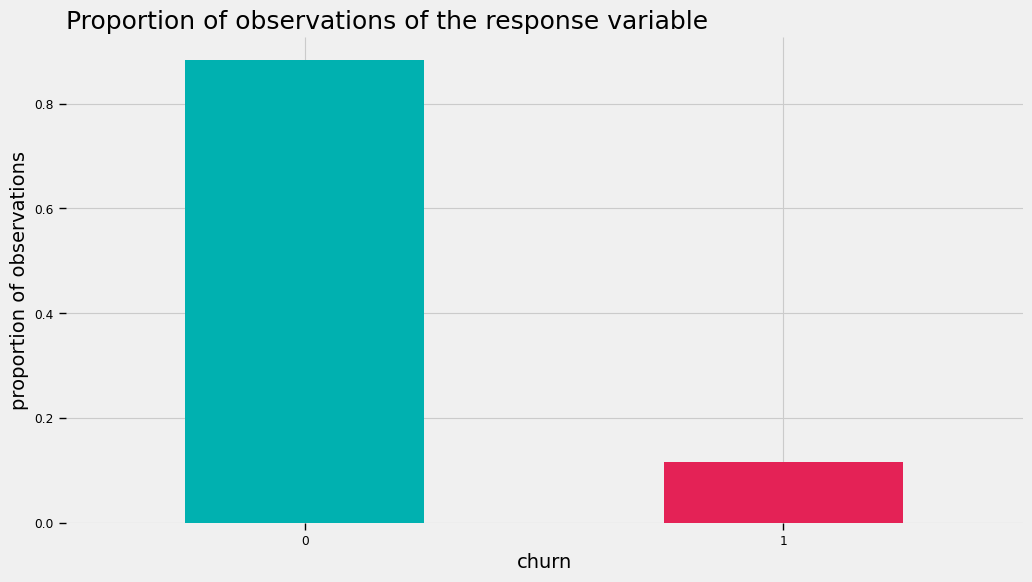

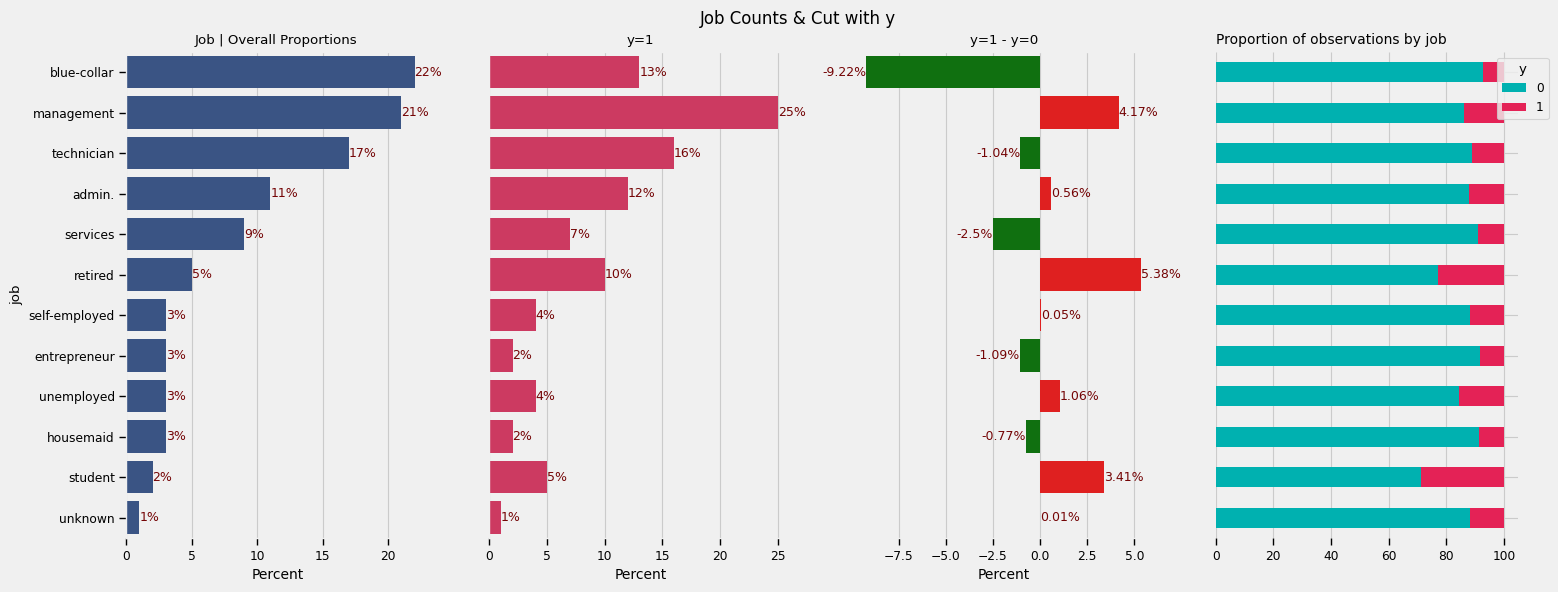

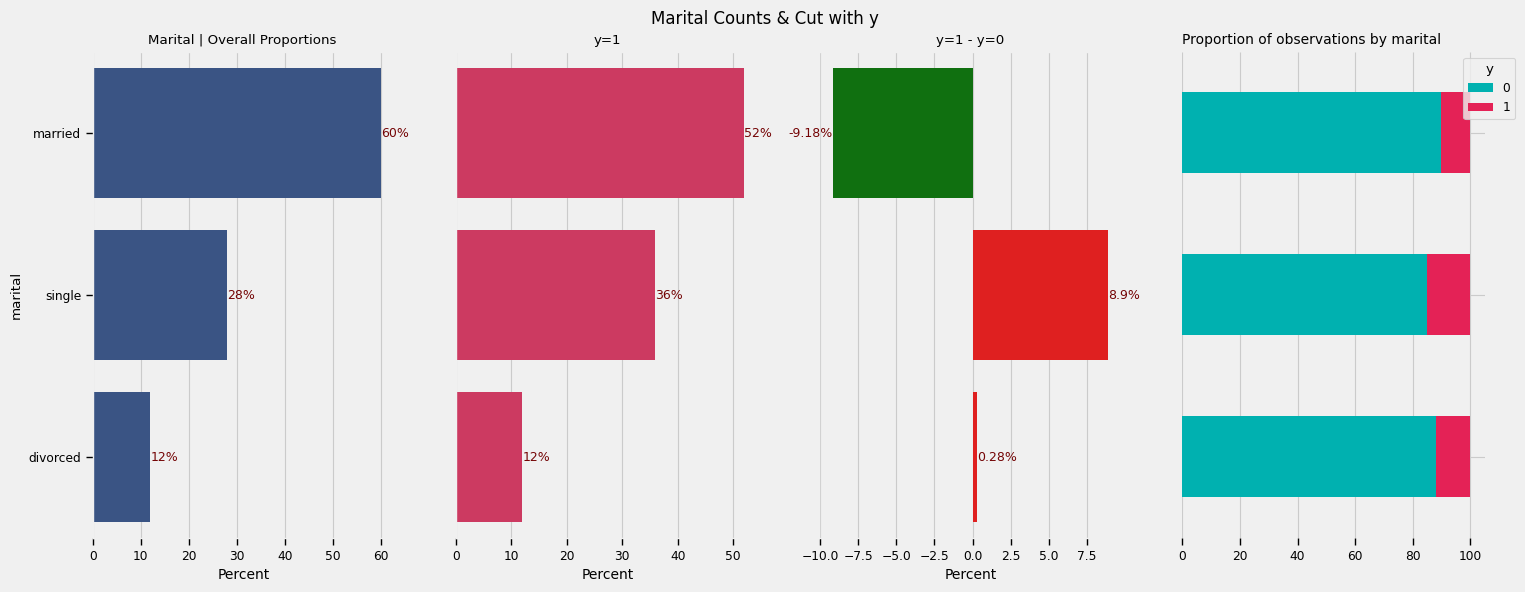

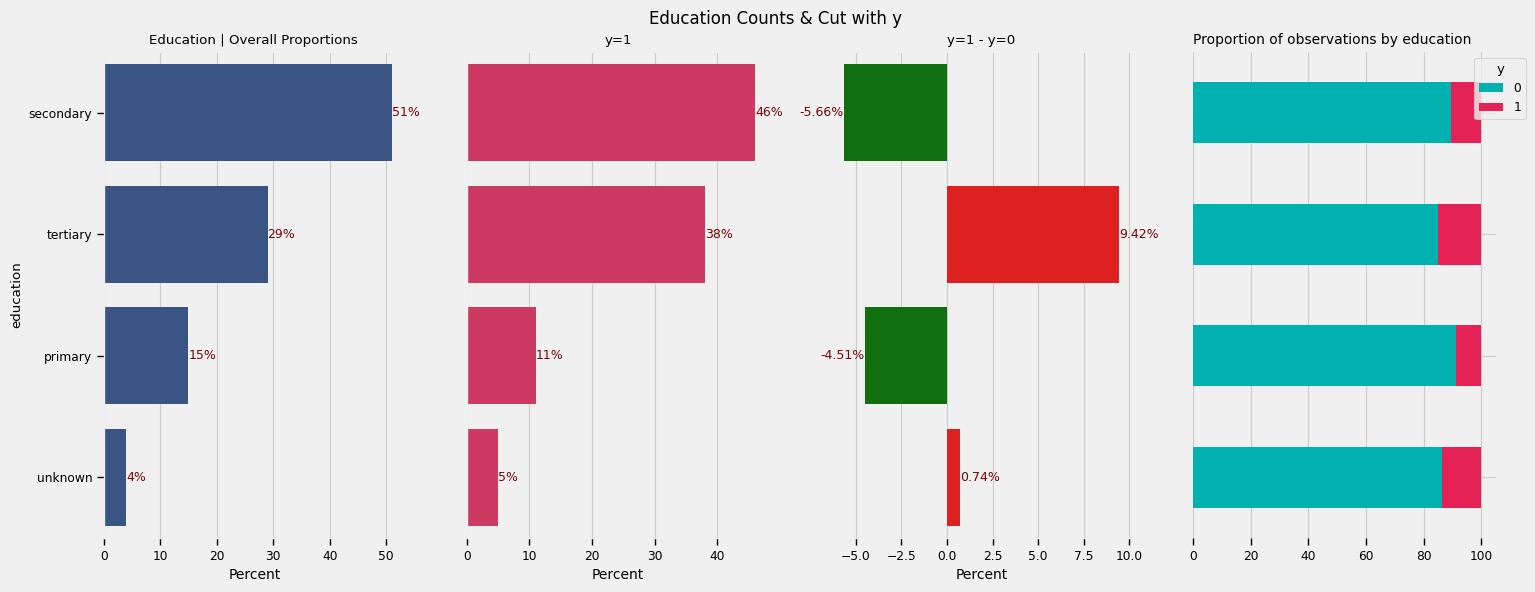

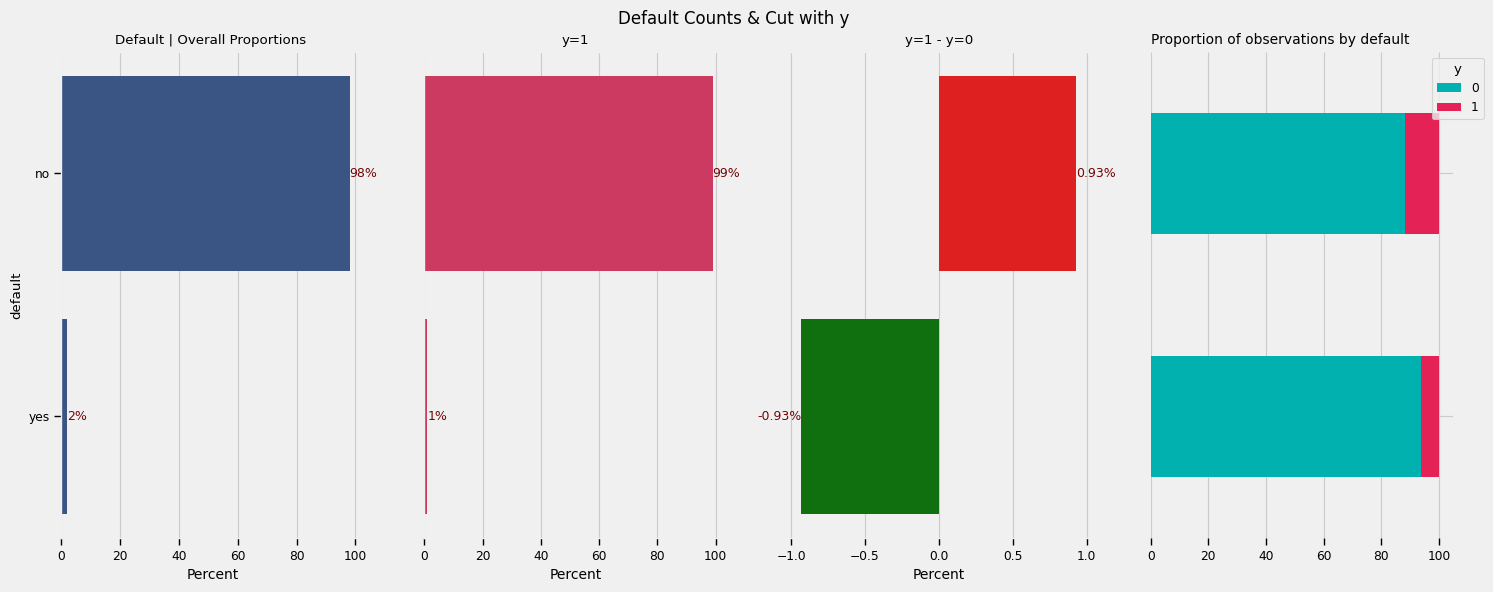

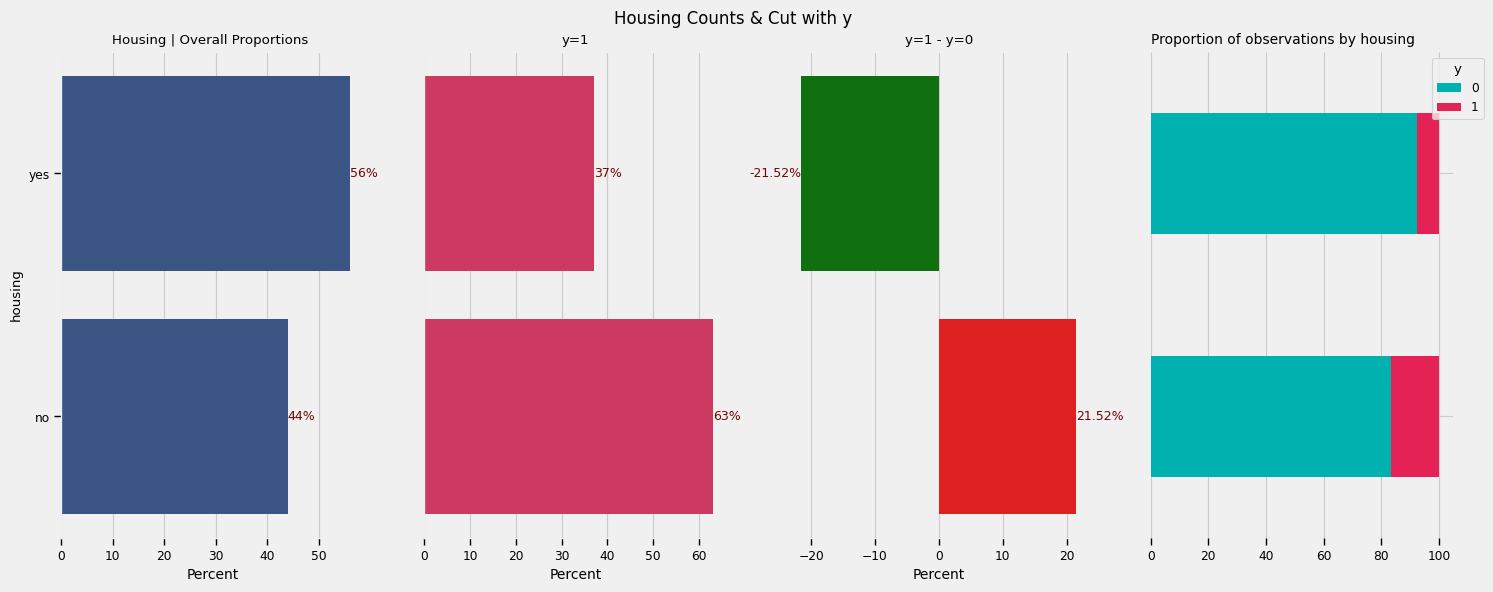

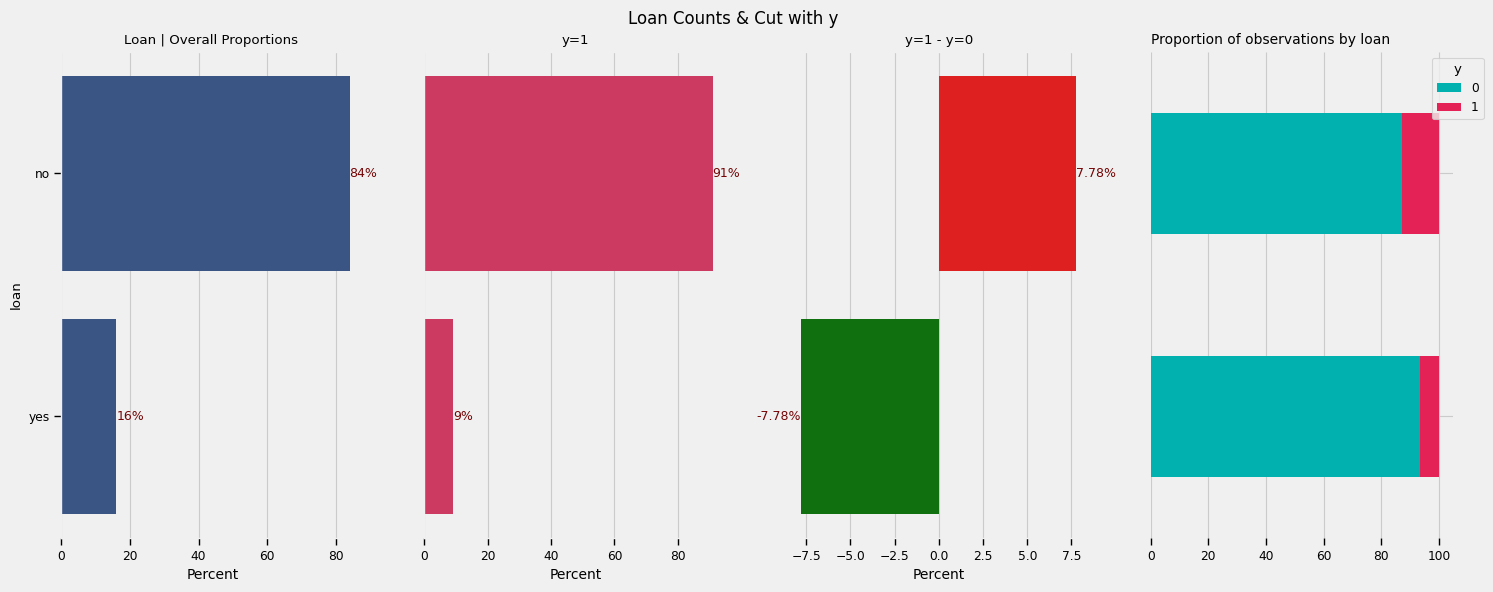

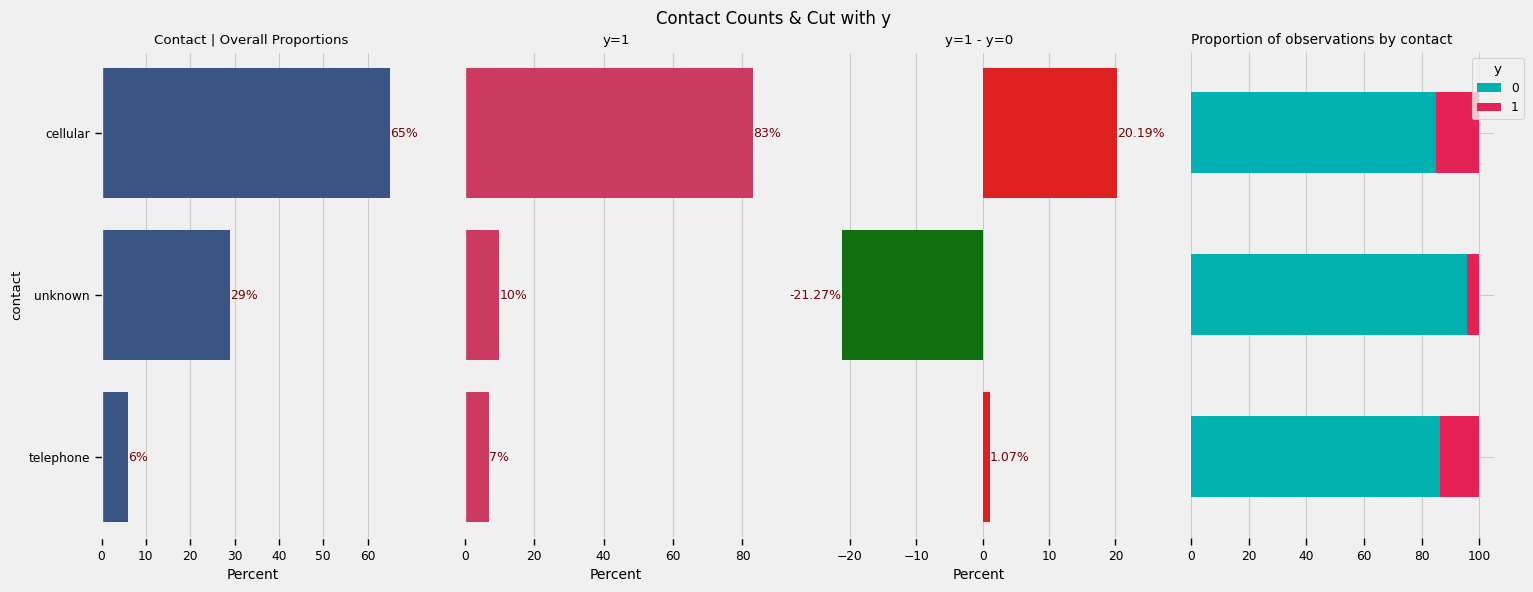

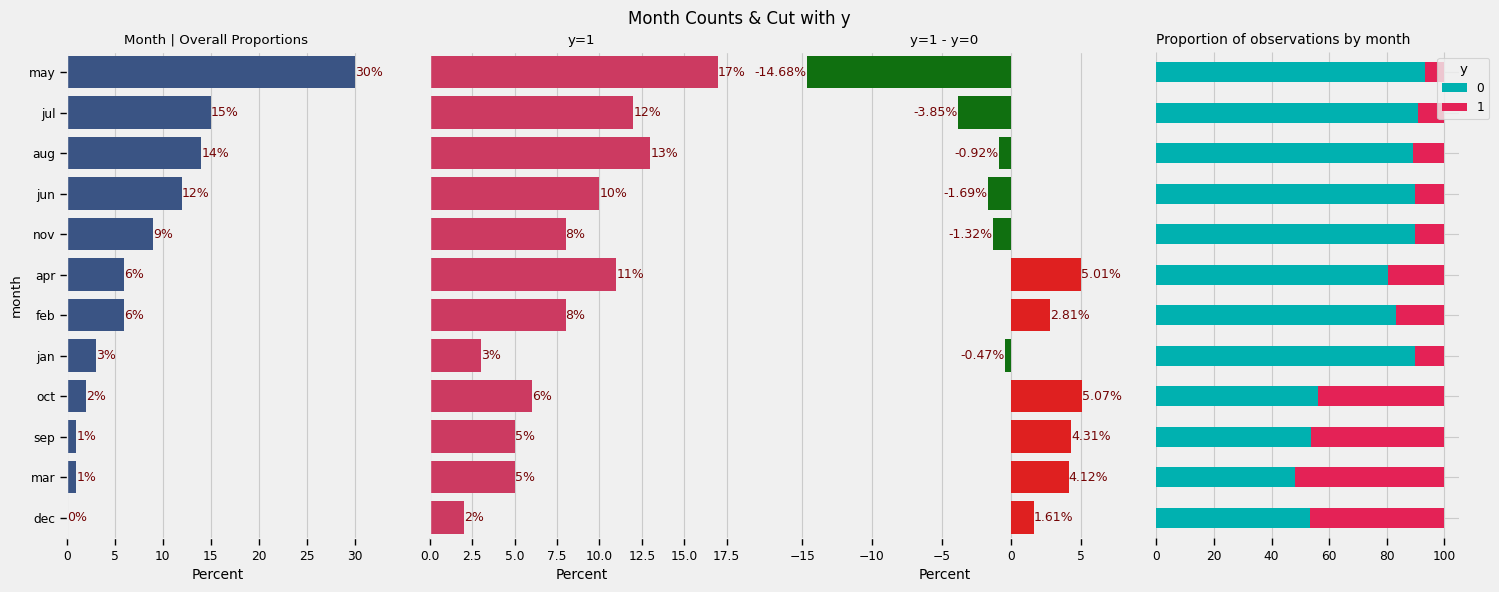

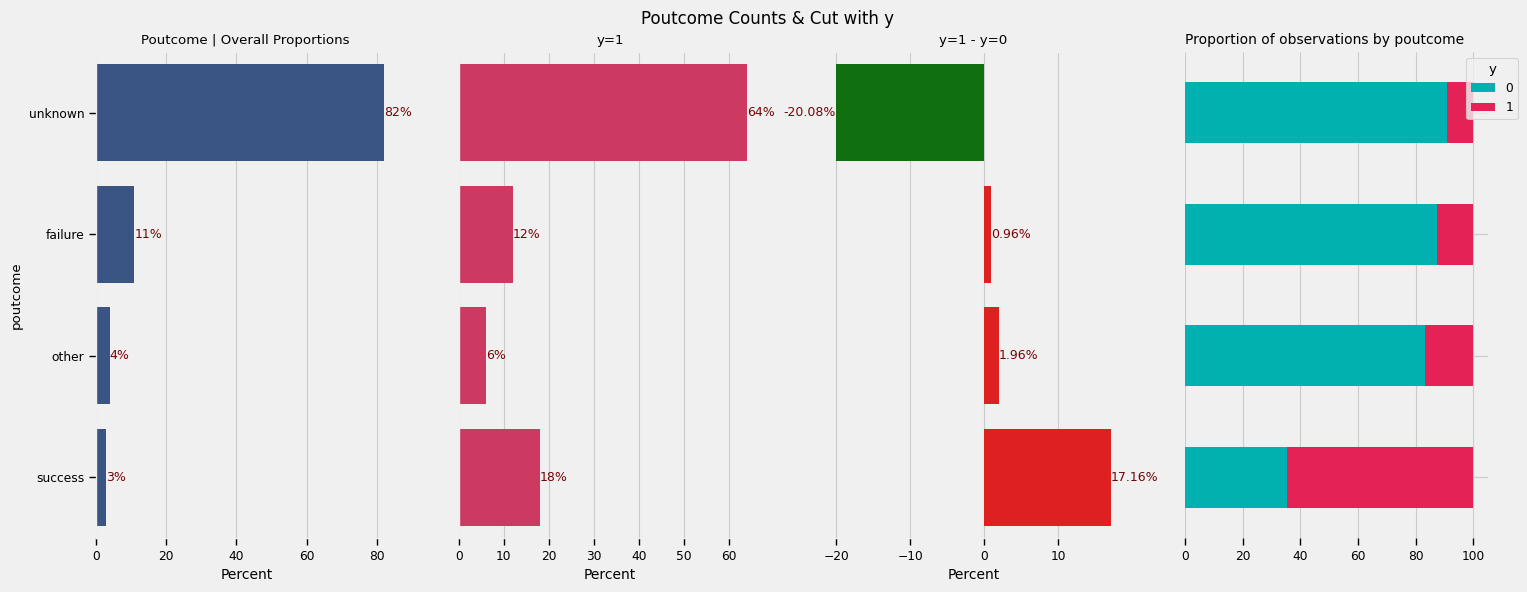

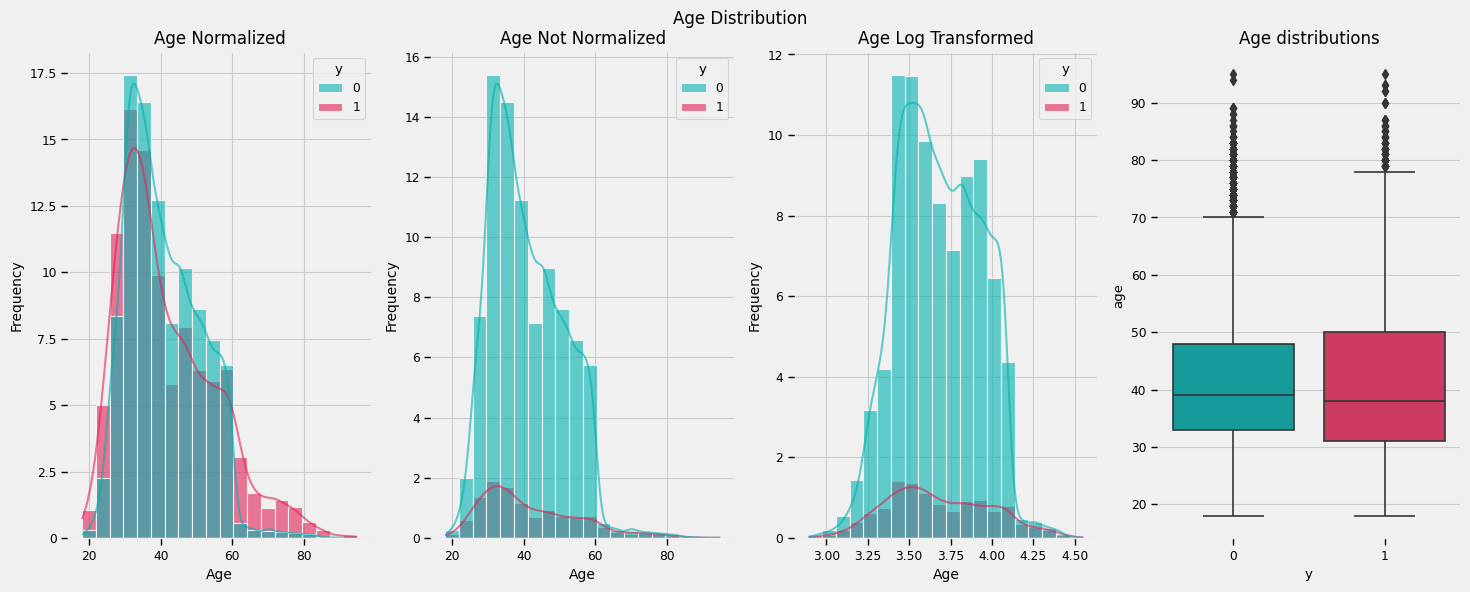

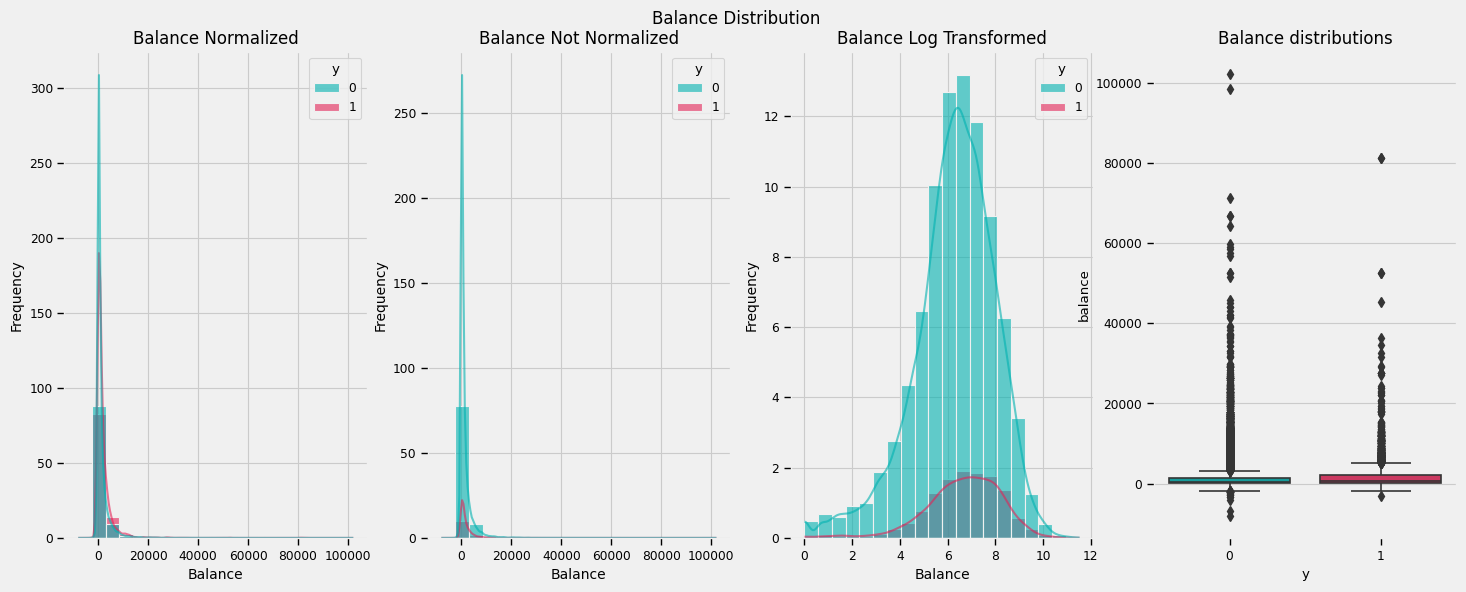

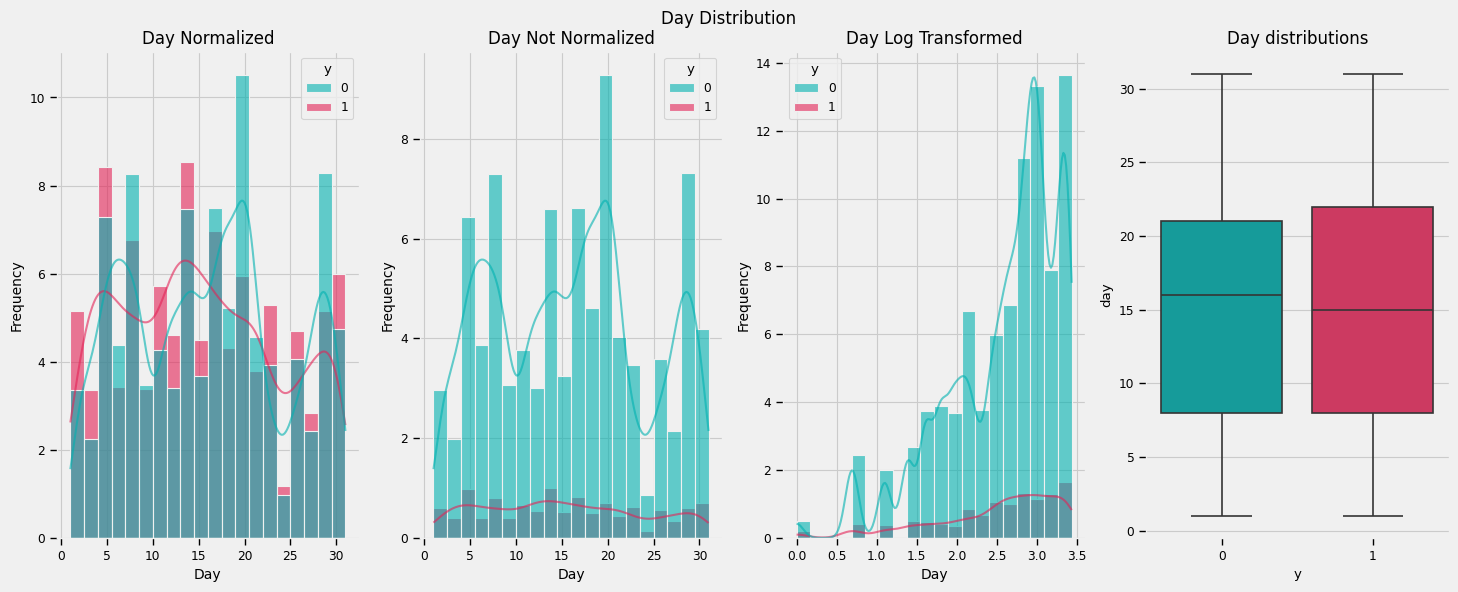

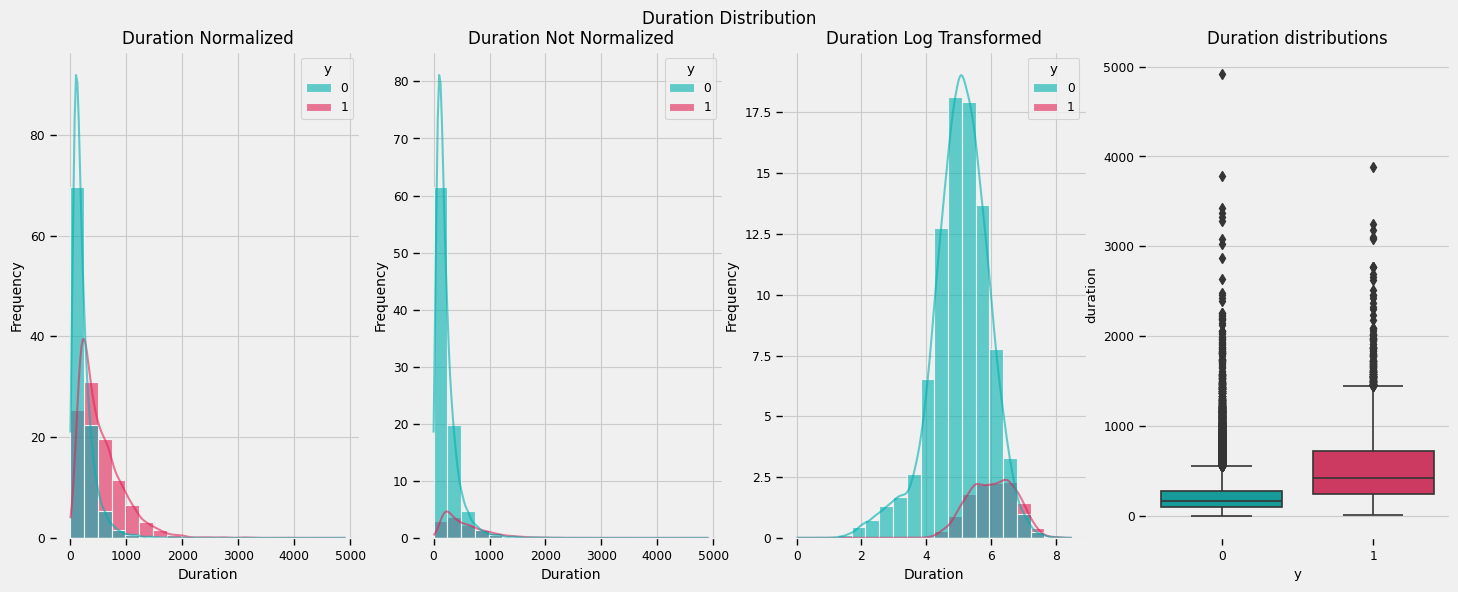

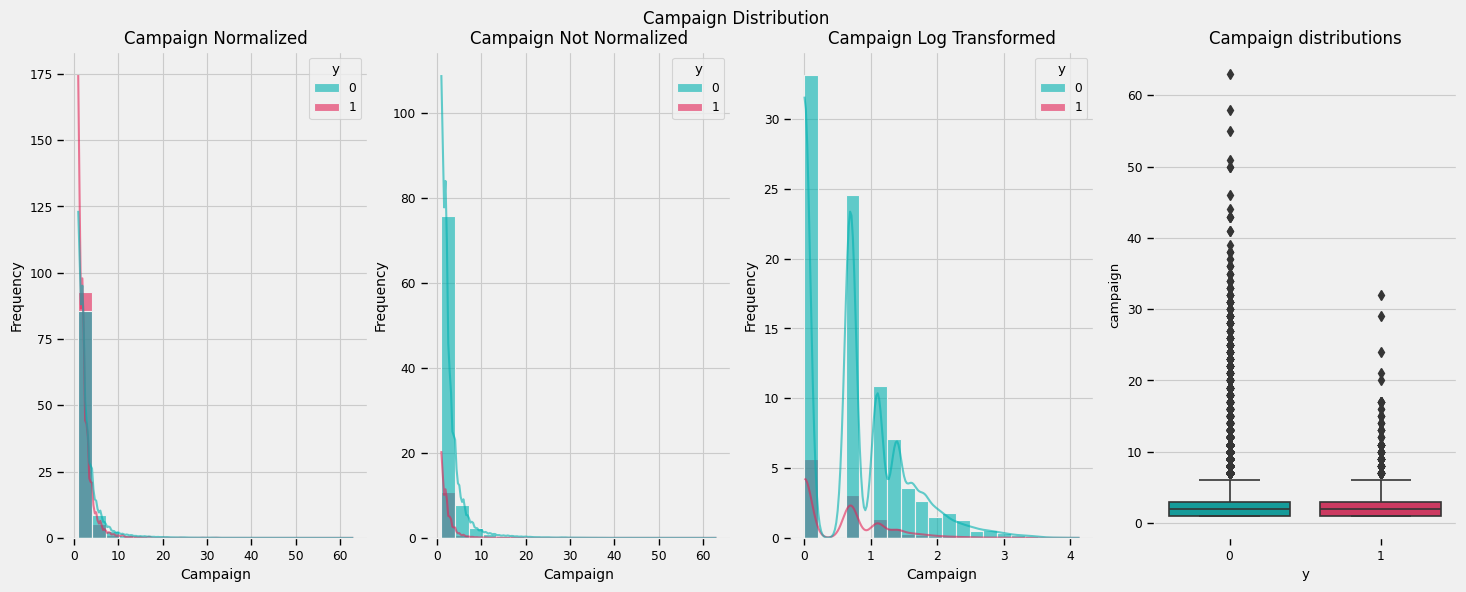

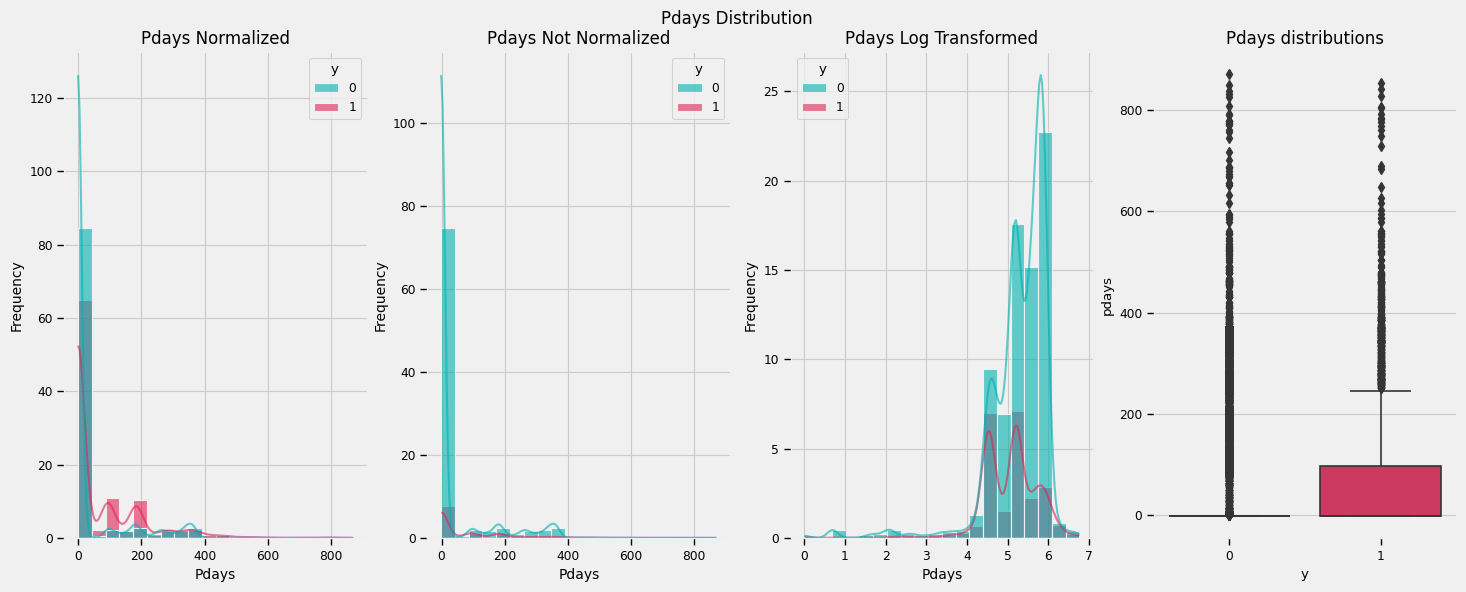

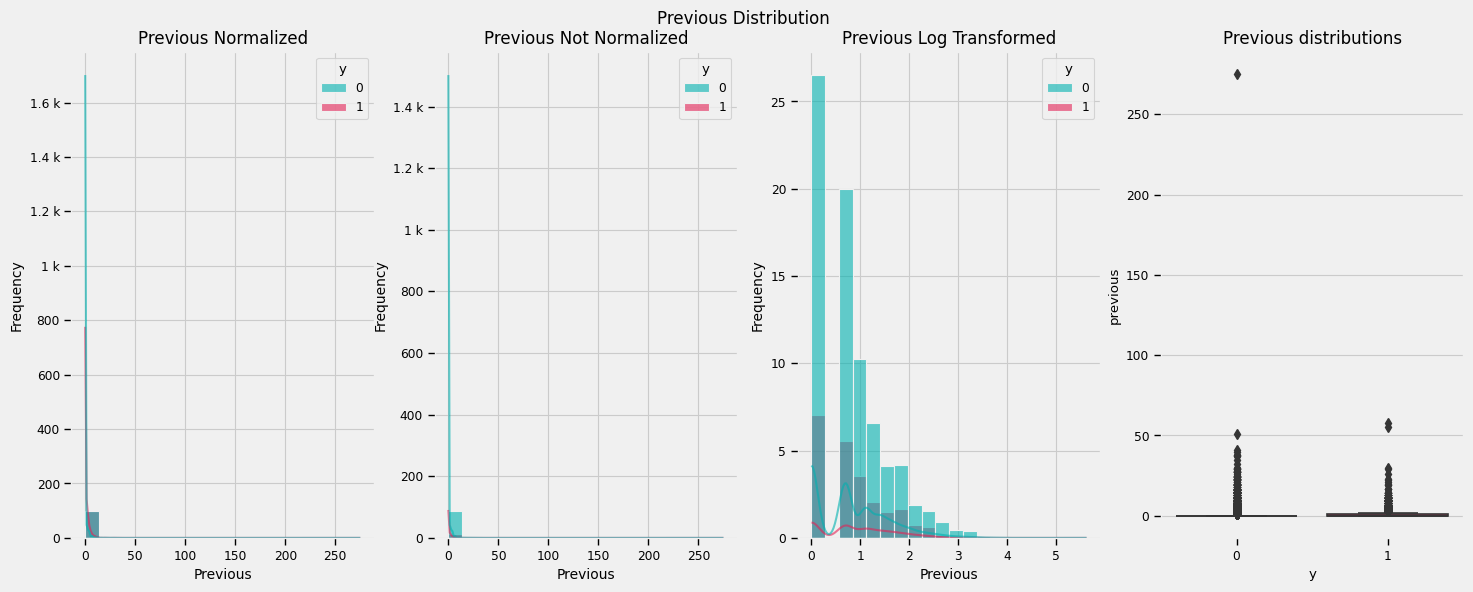

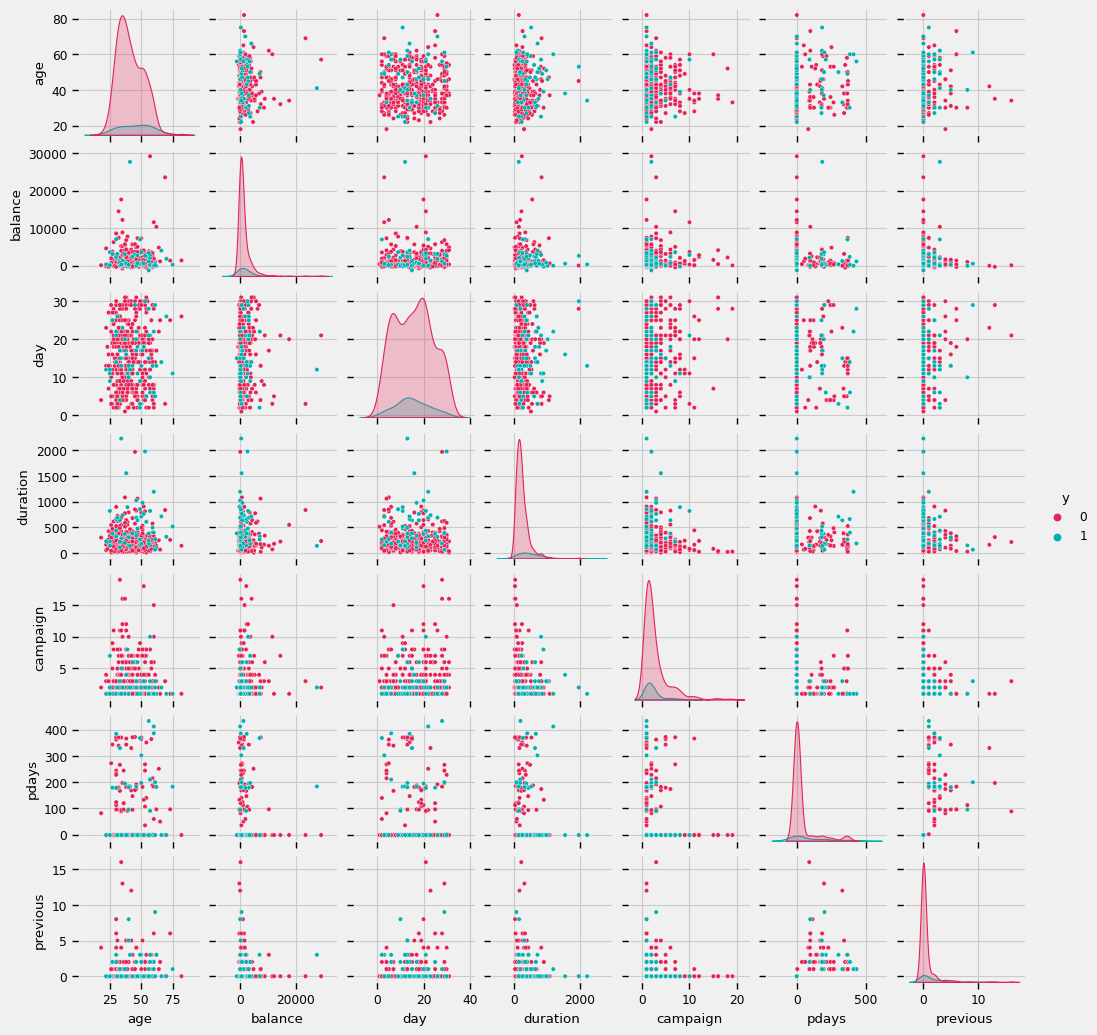

,age,balance,day,duration,campaign,pdays,previous,y
age,nan,nan,nan,nan,nan,nan,nan,nan
balance,0.10,nan,nan,nan,nan,nan,nan,nan
day,-0.01,0.00,nan,nan,nan,nan,nan,nan
duration,-0.00,0.02,-0.03,nan,nan,nan,nan,nan
campaign,0.00,-0.01,0.16,-0.08,nan,nan,nan,nan
pdays,-0.02,0.00,-0.09,-0.00,-0.09,nan,nan,nan
previous,0.00,0.02,-0.05,0.00,-0.03,0.45,nan,nan
y,0.03,0.05,-0.03,0.39,-0.07,0.10,0.09,nan


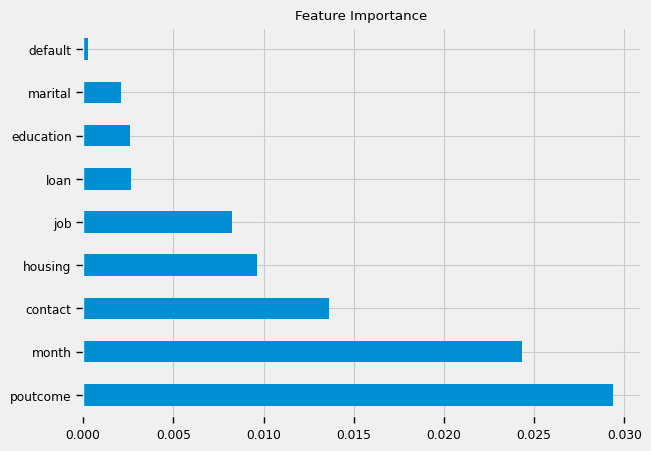

In [71]:
eda_helper.init_diagnostic()